In [41]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from ipywidgets import interact, fixed

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation
from matplotlib.animation import FFMpegWriter
pd.set_option('max_columns', 100)

import dateutil
from math import radians
from IPython.display import Video

import warnings
warnings.filterwarnings('ignore')

In [3]:
players = pd.read_csv('./data/players.csv')
games = pd.read_csv('./data/games.csv')
plays = pd.read_csv('./data/plays.csv')

In [22]:
WEEK = 1
week_str = './data/week' + str(WEEK) + '.CSV'
week = pd.read_csv(week_str)

In [23]:
GAME = 2018090600
PLAY = 75
play_data = week.loc[(week['gameId'] == GAME) & (week['playId'] == PLAY)]

In [26]:
OFFENSIVE_TEAM = play_data[play_data['position'] == 'QB'].team.values[0]
DEFENSIVE_TEAM = ('home' if OFFENSIVE_TEAM == 'away' else 'away')
frames = pd.unique(play_data.frameId)

KeyboardInterrupt: 

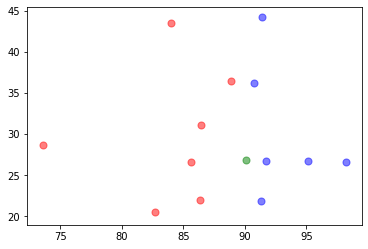

In [40]:
for frameId in frames:
    frame_data = play_data[play_data['frameId'] == frameId]
    
    offense_x, offense_y, defense_x, defense_y, football_x, football_y = [], [], [], [], [], []
    for _, row in frame_data.iterrows():
        if row.team == OFFENSIVE_TEAM:
            offense_x.append(row.x)
            offense_y.append(row.y)
        elif row.team == DEFENSIVE_TEAM:
            defense_x.append(row.x)
            defense_y.append(row.y)
        elif row.team == 'football':
            football_x.append(row.x)
            football_y.append(row.y)
            
    
        